# 타이타닉 생존자 예측하기

- The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 
- 1912년 4월 15일 2224명의 승객중에서 1502명의 승객이 죽었다. 어떤 승객이 죽고, 어떤 승객이 살았는지 예측해보자

In [1]:
#!pip install seaborn

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt #시각화를 위한 pyplot로딩하기
import seaborn as sns #seaborn 로딩하기

# 1단계: 데이터준비하기

In [4]:
train = pd.read_csv("data/titanic_train.csv")
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test = pd.read_csv("data/titanic_test.csv", index_col=["PassengerId"])

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2단계: EDA
### Countplot

In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

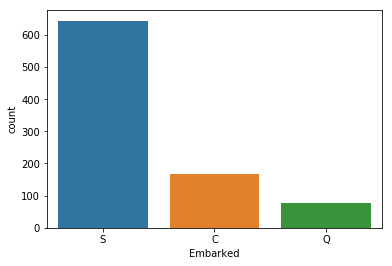

In [9]:
sns.countplot(data=train, x="Embarked")

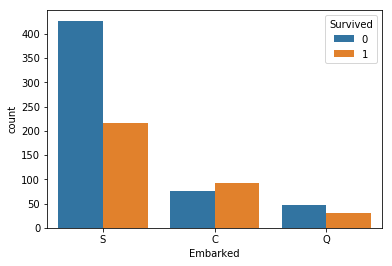

In [10]:
sns.countplot(data=train, x="Embarked", hue="Survived")

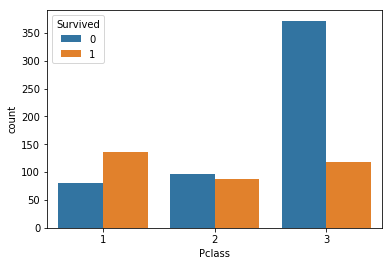

In [11]:
sns.countplot(data=train, x="Pclass", hue="Survived")

### Barplot

/Users/kyung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


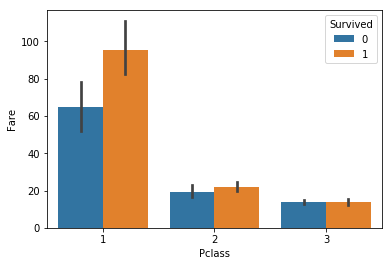

In [12]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

### distplot

In [13]:
train.shape

(891, 12)

In [14]:
fare= train[train["Fare"]>0].count()
fare

PassengerId    876
Survived       876
Pclass         876
Name           876
Sex            876
Age            707
SibSp          876
Parch          876
Ticket         876
Fare           876
Cabin          201
Embarked       874
dtype: int64

/Users/kyung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


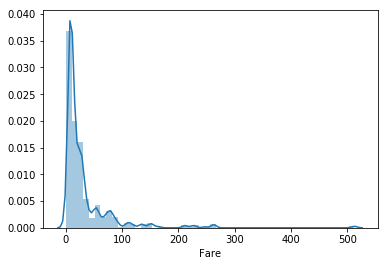

In [15]:
sns.distplot(train["Fare"], hist=True)

/Users/kyung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


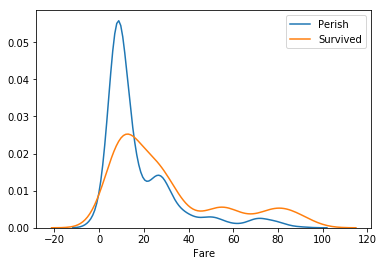

In [16]:
ignore_high_fare = train[train["Fare"] < 100]

perish = ignore_high_fare[ignore_high_fare['Survived'] == 0]
survived = ignore_high_fare[ignore_high_fare['Survived'] == 1]

sns.distplot(perish["Fare"], hist=False, label="Perish")
sns.distplot(survived["Fare"], hist=False, label="Survived")

### Implot

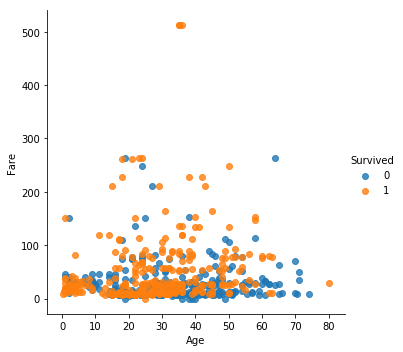

In [17]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

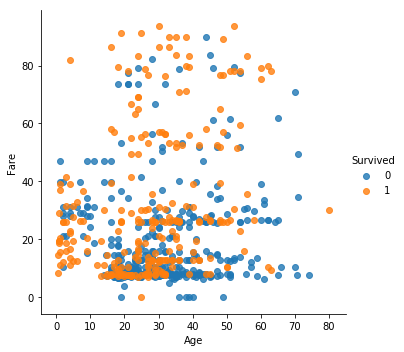

In [18]:
sns.lmplot(data=ignore_high_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

### subplot

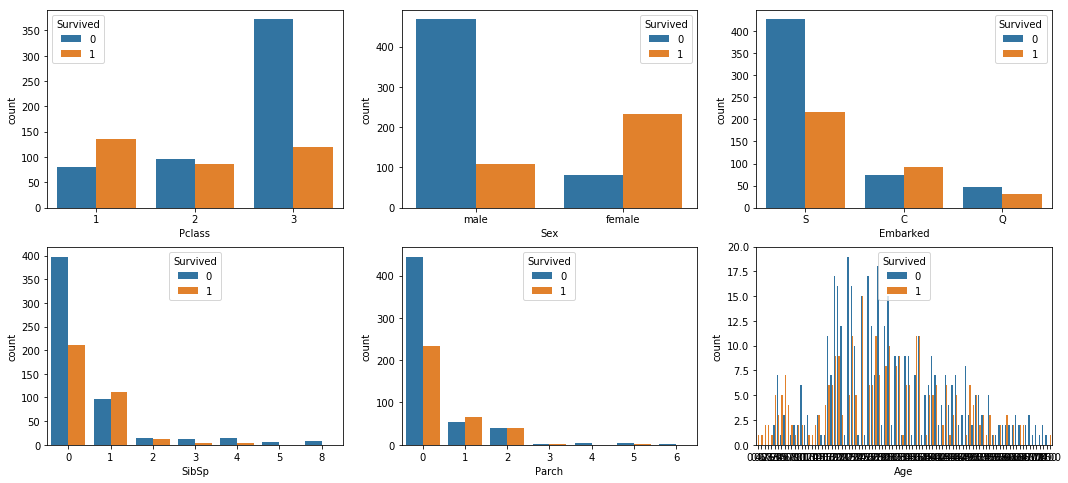

In [19]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)
sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax4)
sns.countplot(data=train, x="Parch", hue="Survived", ax=ax5)
sns.countplot(data=train, x="Age", hue="Survived", ax=ax6)

In [20]:
train['Name'].sample(20)

369                      Aubart, Mme. Leontine Pauline
778                            Kilgannon, Mr. Thomas J
47                           O'Driscoll, Miss. Bridget
750                                  Wells, Miss. Joan
163                                    Calic, Mr. Jovo
36                                    Mamee, Mr. Hanna
603                          Torber, Mr. Ernst William
517                                  Ryan, Mr. Patrick
537                                LeRoy, Miss. Bertha
454                                Peduzzi, Mr. Joseph
805                          Johansson, Mr. Karl Johan
795                                 Otter, Mr. Richard
471                                    Cacic, Mr. Luka
412                             Minahan, Miss. Daisy E
644                             Baclini, Miss. Eugenie
424                        Rosblom, Mr. Viktor Richard
738                                 Ivanoff, Mr. Kanio
340                     Navratil, Master. Edmond Roger
443       

> **Q. Name 컬럼의 정보들이 정말 예측에 도움이 되지 않을까?**

- 호칭 잘라내는 함수 정의

In [21]:
def find_title(name):
    return name.split(", ")[1].split(".")[0]

train["Title"]=train["Name"].apply(find_title)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


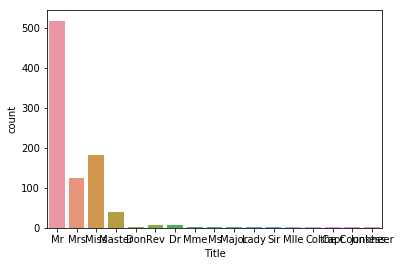

In [22]:
sns.countplot(data=train, x="Title")

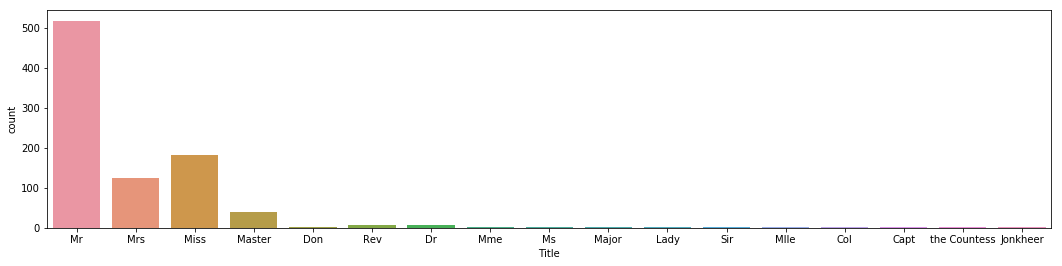

In [23]:
figure, ax=plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)
sns.countplot(data=train, x="Title", ax=ax)

# 3단계: 데이터 전처리

### Encode Sex

In [24]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 14)


,Sex,Sex_encode
0,male,0.0
1,female,1.0
2,female,1.0
3,female,1.0
4,male,0.0


In [25]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1


print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


### Fill in missing fare

In [26]:
mean_fare = train["Fare"].mean()

print("Fare(Mean) = ${0:.3f}".format(mean_fare))

test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

test[pd.isnull(test["Fare"])]

Fare(Mean) = $32.204


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


### Encode Embarked

In [27]:
train_embarked = pd.get_dummies(train["Embarked"], prefix="Embarked")

print(train_embarked.shape)
train_embarked.head()

(891, 3)


,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
test_embarked = pd.get_dummies(test["Embarked"], prefix="Embarked")

print(test_embarked.shape)
test_embarked.head()

(418, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


In [29]:
train = pd.concat([train, train_embarked], axis=1)

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(891, 17)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0,0,1
1,C,1,0,0
2,S,0,0,1
3,S,0,0,1
4,S,0,0,1


In [30]:
test = pd.concat([test, test_embarked], axis=1)

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(418, 14)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
892,Q,0,1,0
893,S,0,0,1
894,Q,0,1,0
895,S,0,0,1
896,S,0,0,1


# 4단계 예측모형

In [31]:
feature_names = ["Pclass", "Sex_encode", "Fare",
                 "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0.0,7.2500,0,0,1
1,1,1.0,71.2833,1,0,0
2,3,1.0,7.9250,0,0,1
3,1,1.0,53.1000,0,0,1
4,3,0.0,8.0500,0,0,1


In [32]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
from sklearn.tree import DecisionTreeClassifier

seed = 37

model = DecisionTreeClassifier(max_depth=5,
                               random_state=seed)

In [34]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm  # support vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure

# model = LogisticRegression()

# model = RandomForestClassifier(n_estimators=340)

/Users/kyung/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 5단계: 학습과 예측

In [35]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

In [38]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
892,3,0.0,7.8292,0,1,0
893,3,1.0,7.0000,0,0,1
894,2,0.0,9.6875,0,1,0
895,3,0.0,8.6625,0,0,1
896,3,1.0,12.2875,0,0,1


In [39]:
prediction = model.predict(X_test)

print(prediction.shape)
prediction[:20]

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

# 6단계: 모델평가

In [41]:
import numpy as np
submission = pd.read_csv("data/gender_submission.csv", index_col="PassengerId")

submission["Survived"] = prediction.astype(np.int32)

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [42]:
submission.to_csv("baseline-script.csv")